# Classification

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

X= digits.data
y= digits.target

print(digits.target_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

[0 1 2 3 4 5 6 7 8 9]


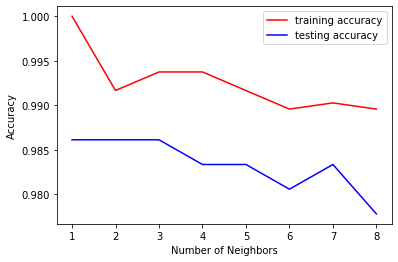

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

train_acc=[]
test_acc=[]
for i in range(1,9,1):
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(X_train, y_train)
    train_acc.append(knn_clf.score(X_train, y_train))
    test_acc.append(knn_clf.score(X_test, y_test))

train_acc = pd.Series(train_acc, index=range(1,9,1))
test_acc = pd.Series(test_acc, index=range(1,9,1))
plt.plot(train_acc, "r-", label="training accuracy")
plt.plot(test_acc, "b-", label="testing accuracy")
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# In conclusion k equals 2 is best


In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
linear_kernel_svm = SVC(kernel='linear', gamma='auto')
rbf_kernel_svm = SVC(kernel='rbf', gamma='auto')
polynomial_kernel_svm = SVC(kernel='poly', gamma='auto')

linear_kernel_svm.fit(X_train, y_train)
rbf_kernel_svm.fit(X_train, y_train)
polynomial_kernel_svm.fit(X_train, y_train)

li_pred = linear_kernel_svm.predict(X_test)
rbf_pred = rbf_kernel_svm.predict(X_test)
poly_pred = polynomial_kernel_svm.predict(X_test)

print("Accuracy: \n %s" %classification_report(y_test, li_pred))
print("Accuracy: \n %s" %classification_report(y_test, rbf_pred))
print("Accuracy: \n %s" %classification_report(y_test, poly_pred))

# I conclude that polynomial kernel is the best in 3 kernel because it has the highest micro avg and macro avg

Accuracy: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.94      0.93        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.89      0.91        35
           9       0.95      1.00      0.97        36

   micro avg       0.98      0.98      0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy: 
               precision    recall  f1-score   support

           0       1.00      0.58      0.74        36
           1       1.00      0.61      0.76        36
           2       1.00      0.63      0.77        35


Confusion matrix, without normalization
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 23  5  0  0  1  1  0  2  4]
 [ 0  1 33  0  0  0  0  0  1  0]
 [ 0  0  1 36  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  1 31  0  0  0  5]
 [ 0  1  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  6  0  0  0  0  0  1 28  0]
 [ 0  1  0  1  0  0  0  3  3 28]]


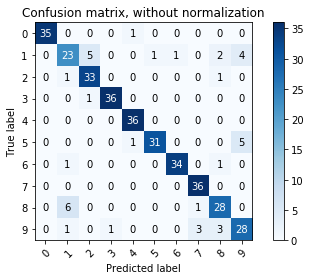

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

naive_clf = MultinomialNB()
naive_clf.fit(X_train,y_train)
naive_pred =naive_clf.predict(X_test)
naive_matrix = confusion_matrix(y_test, naive_pred)
plot_confusion_matrix(y_test, naive_pred,digits.target_names)


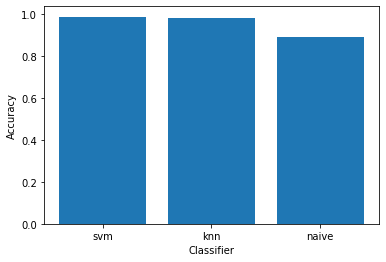

In [8]:
svm_score = polynomial_kernel_svm.score(X_test, y_test)
knn_score = knn_clf.score(X_test, y_test)
naive_score = naive_clf.score(X_test, y_test)

fig, ax = plt.subplots()

plt.bar(['svm', 'knn', 'naive'], [svm_score, knn_score, naive_score])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()

# Regression

In [89]:
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_csv('gapminder.csv')
label = LabelEncoder()

df['Region'] = label.fit_transform(df['Region'])
clean_df = df.copy()

In [94]:
df.shape

(139, 10)

In [90]:
corr_matrix = clean_df.corr()

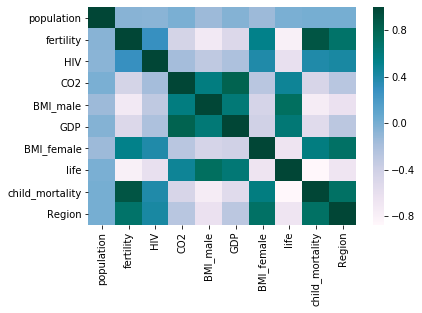

In [91]:
sb.heatmap(corr_matrix, cmap='PuBuGn')


In [109]:
from sklearn.linear_model import LinearRegression
clean_df_y = clean_df['life']
clean_df_x = clean_df['fertility']
X_train, X_test, y_train, y_test = train_test_split(clean_df_x, clean_df_y, test_size =0.2, random_state=42)
lin_reg = LinearRegression()

lin_reg.fit(X_train.values.reshape(-1, 1), y_train)
lin_pred = lin_reg.predict(X_test.values.reshape(-1,1))
fertility_score = lin_reg.score(X_test.values.reshape(-1,1), y_test)

0

Text(0, 0.5, 'Life Expectancy')

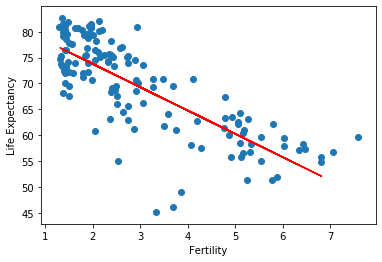

In [110]:
plt.plot(X_test, lin_pred, 'r-')
plt.scatter(clean_df['fertility'], clean_df['life'])
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')

In [111]:
clean_df_y = clean_df['life']
clean_df_x = clean_df.drop(columns =['life'], axis=1)

Allx_train, Allx_test, Ally_train, Ally_test = train_test_split(clean_df_x, clean_df_y, test_size =0.2, random_state=42)
lin_reg = LinearRegression()

lin_reg.fit(Allx_train, Ally_train)
lin_pred = lin_reg.predict(Allx_test)

all_score = lin_reg.score(Allx_test, Ally_test)

## Compare model score

In [106]:
print('All: %f vs Fertility: %f' %(all_score, fertility_score))

All: 0.924119 vs Fertility: 0.809571


## 5 fold cross_validation

In [131]:
from sklearn.model_selection import cross_val_score
one_scores = cross_val_score(lin_reg, X_train.values.reshape(-1,1), y_train, scoring='neg_mean_squared_error', cv=5, error_score='raise')
all_scores = cross_val_score(lin_reg, Allx_train, Ally_train, scoring='neg_mean_squared_error', cv=5, error_score='raise')

one_scores = np.sqrt(-one_scores)
all_scores = np.sqrt(-all_scores)

In [132]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [133]:
display_scores(one_scores)

Scores: [4.63482636 6.6095477  7.35866709 5.09241256 6.63933574]
Mean: 6.066957890829173
Standard deviation: 1.0287149354347138


In [134]:
display_scores(all_scores)

Scores: [4.32443861 3.29903086 2.49637583 4.12523498 3.68525709]
Mean: 3.5860674755340973
Standard deviation: 0.6504690654285343


#### All feature perform better than only one feature. But Fertility definitely is one of the most important feature